In [1]:
import pandas as pd

In [2]:
df_kosis=pd.read_csv('./korean_baby.csv',encoding='cp949') #한글로 인코딩
df_kosis.shape#csv파일의 행과 열의 수

(19, 829)

In [3]:
df_kosis.head()#데이터 앞쪽부분 불러오기

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,11602,25613,12989,12624,23727,12097,11630,21228,11023,10205
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2066,4513,2337,2176,4170,2128,2042,3670,1953,1717
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,642,1430,717,713,1321,683,638,1240,671,569
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,514,1150,600,550,1100,585,515,942,488,454


In [4]:
df=df_kosis.melt(id_vars='시군구별',var_name='기간',value_name='출생아수')#시군구별을 고정하고 melt하기

In [5]:
df.head()

,시군구별,기간,출생아수
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345


In [6]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [7]:
df[df['시군구별']!='시군구별'] #시군구별이 아닌 데이터만 사용하기

,시군구별,기간,출생아수
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646
...,...,...,...
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646


In [8]:
print(df.shape)#시군구별 데이터를 제외하기전 행과 열의 갯수
df=df[df['시군구별']!='시군구별'].copy() #시군구별 데이터를 제외하고 가져옴
df.shape #시군구별 데이터를 제외한후 행과 열의 갯수

(15732, 3)


(14904, 3)

In [9]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [10]:
df["기간"].str.split('.',expand=True) #데이터프레임형태로 보여주기

,0,1,2
1,1997,01,None
2,1997,01,None
3,1997,01,None
4,1997,01,None
5,1997,01,None
...,...,...,...
15727,2019,12,2
15728,2019,12,2
15729,2019,12,2
15730,2019,12,2


In [11]:
df['연도']=df["기간"].str.split('.',expand=True)[0]
df['월']=df['기간'].str.split('.',expand=True)[1]
df['성별']=df['기간'].str.split('.',expand=True)[2]
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [12]:
df["성별"].unique() #1과 2는 숫자가 아닌 object(string)

array([None, '1', '2'], dtype=object)

In [13]:
df['성별'].nunique() #1과 2가 있으므로 2개

2

In [14]:
df['성별']=df['성별'].fillna("전체")
df['성별']=df['성별'].replace('1','남')
df['성별']=df['성별'].replace('2','여')
df['성별'].unique() #누락값을 '전체'로 바꿈 1은 남자, 2는 여자

array(['전체', '남', '여'], dtype=object)

In [15]:
df['성별'].value_counts()

전체    4968
여     4968
남     4968
Name: 성별, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    14904 non-null  object
 1   기간      14904 non-null  object
 2   출생아수    14904 non-null  object
 3   연도      14904 non-null  object
 4   월       14904 non-null  object
 5   성별      14904 non-null  object
dtypes: object(6)
memory usage: 815.1+ KB


In [17]:
df['출생아수'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [18]:
import numpy as np
df['출생아수']=df['출생아수'].replace('-',np.nan)
df['출생아수'].astype(int)

ValueError: cannot convert float NaN to integer

In [19]:
type(np.nan) #float은 int형으로 변환안되니

float

In [20]:
df['출생아수']=df['출생아수'].astype(float)

In [21]:
df['출생아수'].describe()

count    14364.000000
mean      3072.798942
std       6683.035581
min         30.000000
25%        638.000000
50%       1045.000000
75%       1947.000000
max      63268.000000
Name: 출생아수, dtype: float64

In [22]:
df_all=df[(df['시군구별']=='전국')&(df['성별']=='전체')]
df_all.head(2)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체


In [23]:
df_all=df_all[["연도","월","출생아수"]].copy()
df_all.head()

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0


In [24]:
import matplotlib.pyplot as plt

plt.rc("font",family="AppleGothic")
#plt.rc("font",family="Malgum Gothic") #윈도우

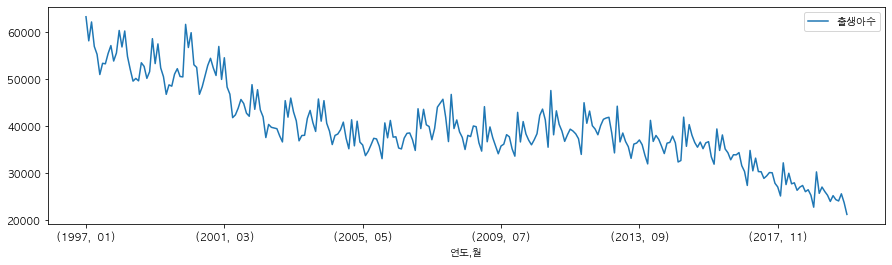

In [25]:
df_all.set_index(["연도","월"]).plot(figsize=(15,4)) 

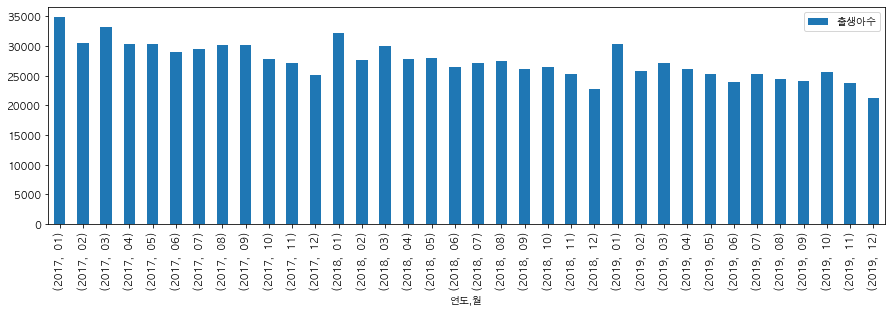

In [26]:
df_all[-36:].set_index(["연도","월"]).plot.bar(figsize=(15,4)) 

In [27]:
import seaborn as sns

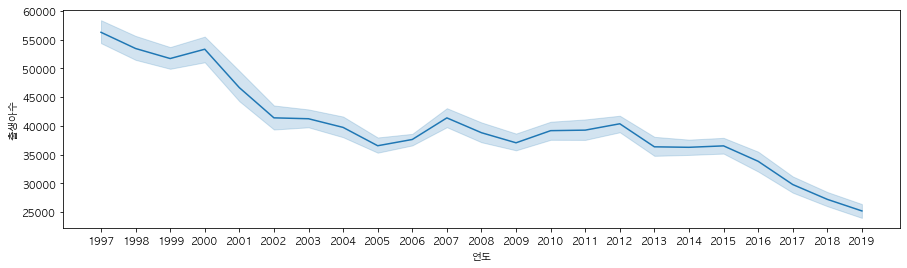

In [28]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x="연도",y="출생아수")
#판다스 그래프로 그릴려면 연산을 따로 해줘야하지만 seaborn은 통계적인연산은 seaborn내부에서 해줌

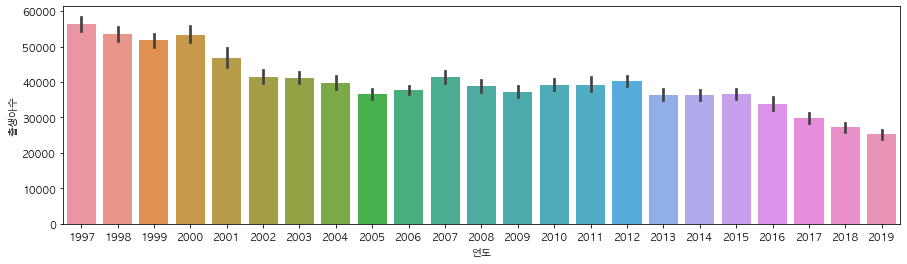

In [29]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all,x="연도",y="출생아수")

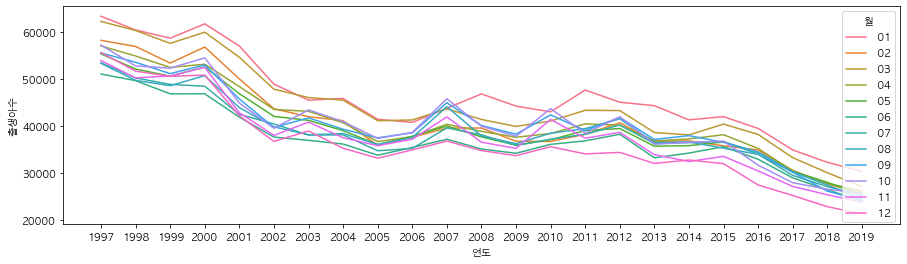

In [30]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x="연도",y="출생아수",ci=None,hue="월")

In [31]:
df_local=df[df["시군구별"]!="전국"].copy()#전국을 제외한
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


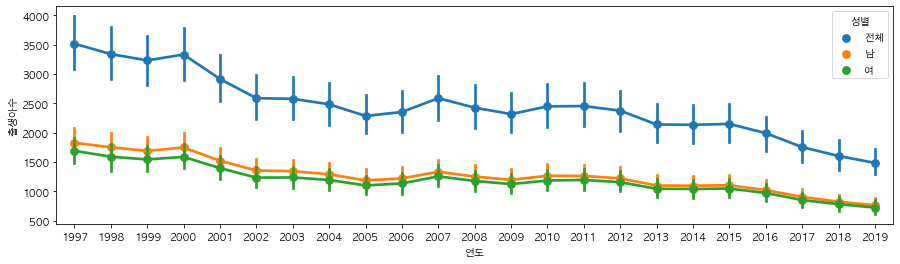

In [32]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local,x='연도',y='출생아수',hue="성별")

In [33]:
df_local_all=df_local[df_local["성별"]=="전체"]
df_local_all.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


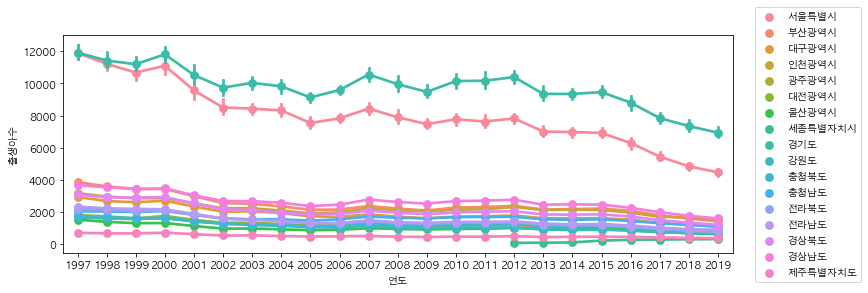

In [34]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_local_all,x="연도",y="출생아수",hue="시군구별")
plt.legend(loc='center right',bbox_to_anchor=(1.20,0.5),ncol=1)#범례조정

In [35]:
df_local_2=df_local_all[df_local_all["시군구별"].isin(["서울특별시","경기도","세종특별자치시"])]
df_local_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
9,세종특별자치시,1997. 01,NaN,1997,01,전체
10,경기도,1997. 01,13440.0,1997,01,전체
59,서울특별시,1997. 02,12239.0,1997,02,전체
66,세종특별자치시,1997. 02,NaN,1997,02,전체


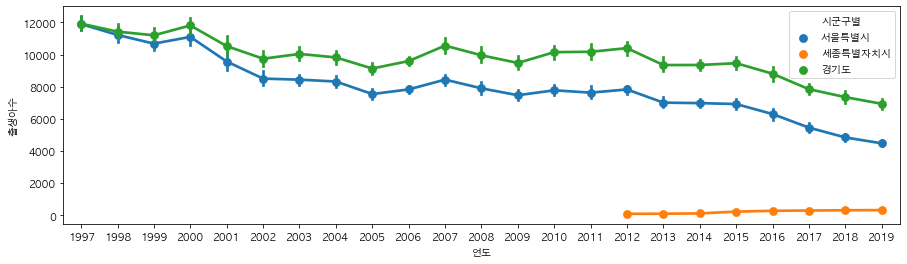

In [36]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_2,x="연도",y="출생아수",hue="시군구별")

In [38]:
df_sj1=df[df['시군구별']=='세종특별자치시']
df_sj1

,시군구별,기간,출생아수,연도,월,성별
9,세종특별자치시,1997. 01,NaN,1997,01,전체
28,세종특별자치시,1997. 01.1,NaN,1997,01,남
47,세종특별자치시,1997. 01.2,NaN,1997,01,여
66,세종특별자치시,1997. 02,NaN,1997,02,전체
85,세종특별자치시,1997. 02.1,NaN,1997,02,남
...,...,...,...,...,...,...
15646,세종특별자치시,2019. 11.1,153.0,2019,11,남
15665,세종특별자치시,2019. 11.2,157.0,2019,11,여
15684,세종특별자치시,2019. 12,274.0,2019,12,전체
15703,세종특별자치시,2019. 12.1,160.0,2019,12,남


In [37]:
df_sj=df[df["시군구별"]=="세종특별자치시"].dropna(how="any")
df_sj.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012. 01,73.0,2012,01,전체
10288,세종특별자치시,2012. 01.1,38.0,2012,01,남
10307,세종특별자치시,2012. 01.2,35.0,2012,01,여
10326,세종특별자치시,2012. 02,74.0,2012,02,전체
10345,세종특별자치시,2012. 02.1,43.0,2012,02,남


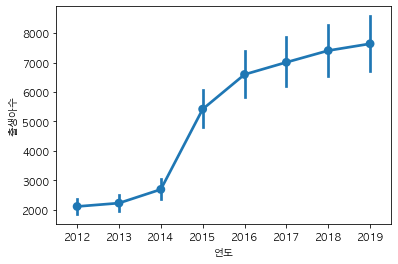

In [39]:
import numpy as np
#estimator은 출생아수 범위 조정(모든 월의 수치를 더함)
sns.pointplot(data=df_sj,x="연도",y="출생아수",estimator=np.sum)